In [49]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
#stochast Gradient Descent
import torch.optim as optim

In [77]:
class DosageNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)
        
        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)

        self.finalBias = nn.Parameter(torch.tensor(0.), requires_grad=True)
        
    def forward(self, input):
        inputToTopRelu = input * self.w00 + self.b00
        outputpRelu = F.relu(inputToTopRelu)
        scaledTopReluOutput = outputpRelu * self.w01

        inputToDownRelu = input * self.w10 + self.b10
        outputDownRelu = F.relu(inputToDownRelu)
        scaledDownReluOutput = outputDownRelu * self.w11

        inputToFinalRelu = scaledTopReluOutput +  scaledDownReluOutput + self.finalBias

        output = F.relu(inputToFinalRelu)

        return output
    

In [69]:
model = DosageNN()
for name, para in model.named_parameters():
    print(name, para)

w00 Parameter containing:
tensor(1.7000)
b00 Parameter containing:
tensor(-0.8500)
w01 Parameter containing:
tensor(-40.8000)
w10 Parameter containing:
tensor(12.6000)
b10 Parameter containing:
tensor(0.)
w11 Parameter containing:
tensor(0.)
finalBias Parameter containing:
tensor(0., requires_grad=True)


In [78]:
dosage = torch.linspace(start=0, end=1, steps=11)
dosage

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])

In [79]:
model = DosageNN()
output = model(dosage)


# Before Optimize


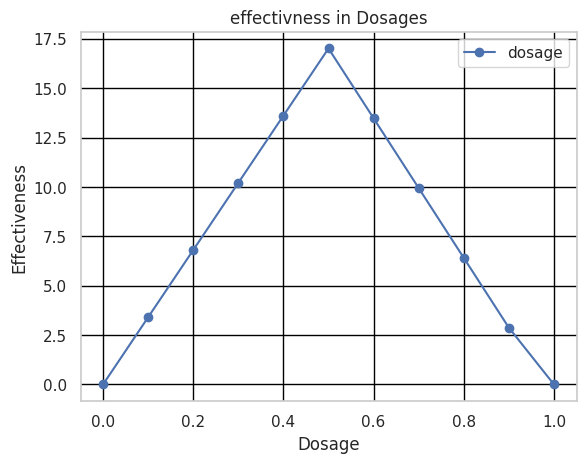

In [80]:
plt.plot(dosage.numpy(), output.detach().numpy(), marker='o', color='b', label='dosage')
plt.xlabel('Dosage')
plt.ylabel('Effectiveness')
plt.title('effectivness in Dosages')
plt.grid(color='black')

plt.legend()
plt.show()

In [81]:
inputs = torch.tensor([0., 0.5, 1.])
labels = torch.tensor([0., 1., 0.])

In [82]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

model = DosageNN()
optimizer = optim.SGD(model.parameters(), lr=0.1)

print("Final bias, before optimization: " + str(model.finalBias.data) + "\n")


for i in range(1000):
    totalLoss = 0
    
    for j in range(len(inputs)):
        input_i = inputs[j]
        label_i = labels[j]
        output_i = model(input_i)
        loss = (output_i - label_i) ** 2 #SSR

        loss.backward()

        totalLoss += float(loss)

                    
    if (totalLoss < 0.0001):
        print("Num steps: " + str(i))
        break

    optimizer.step()
    optimizer.zero_grad()
    print("Step: " + str(i) + " Final Bias: " + str(model.finalBias.data) + "\n")
  

print("Total loss: " + str(totalLoss))
print("Final bias, after optimization: " + str(model.finalBias.data))


      

Final bias, before optimization: tensor(0.)

Step: 0 Final Bias: tensor(-3.2020)

Step: 1 Final Bias: tensor(-5.7636)

Step: 2 Final Bias: tensor(-7.8129)

Step: 3 Final Bias: tensor(-9.4523)

Step: 4 Final Bias: tensor(-10.7638)

Step: 5 Final Bias: tensor(-11.8131)

Step: 6 Final Bias: tensor(-12.6525)

Step: 7 Final Bias: tensor(-13.3240)

Step: 8 Final Bias: tensor(-13.8612)

Step: 9 Final Bias: tensor(-14.2909)

Step: 10 Final Bias: tensor(-14.6348)

Step: 11 Final Bias: tensor(-14.9098)

Step: 12 Final Bias: tensor(-15.1298)

Step: 13 Final Bias: tensor(-15.3059)

Step: 14 Final Bias: tensor(-15.4467)

Step: 15 Final Bias: tensor(-15.5594)

Step: 16 Final Bias: tensor(-15.6495)

Step: 17 Final Bias: tensor(-15.7216)

Step: 18 Final Bias: tensor(-15.7793)

Step: 19 Final Bias: tensor(-15.8254)

Step: 20 Final Bias: tensor(-15.8623)

Step: 21 Final Bias: tensor(-15.8919)

Step: 22 Final Bias: tensor(-15.9155)

Step: 23 Final Bias: tensor(-15.9344)

Step: 24 Final Bias: tensor(-15.9

# After optimization

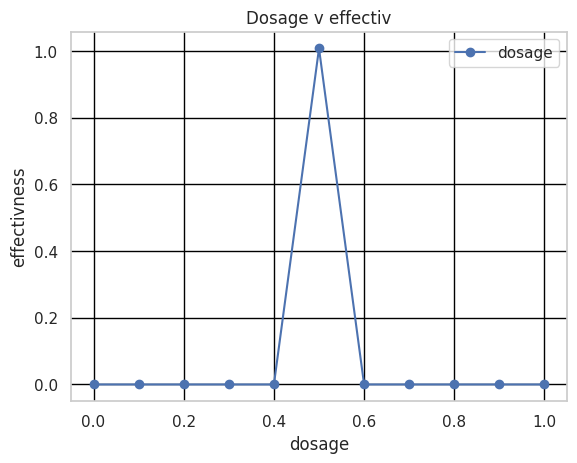

In [84]:
output = model(dosage)

plt.plot(dosage.numpy(), output.detach().numpy(), marker='o', color='b', label='dosage')
plt.xlabel('dosage')
plt.ylabel('effectivness')
plt.title('Dosage v effectiv')
plt.grid(color='black')

plt.legend()
plt.show()
